In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Data Preprocessing

In [2]:
# xls = pd.ExcelFile('CAC.xlsx')
# df1 = pd.read_excel(xls, 'Worksheet', usecols=[0,1,2])
# valeurs=[i for i in range(124) if i%3==1]
# df_temp = pd.read_excel(xls, 'Data', parse_dates=True).dropna(axis=1,how='all')
# Date=df_temp["CAC Index"][1:].rename("Date")
# df2=pd.read_excel(xls, 'Data', parse_dates=True, usecols=valeurs,skiprows=1).set_index(Date)

In [5]:
xls = pd.ExcelFile('cac40.xls')
df_brut1 = pd.read_excel(xls, 'Poids', usecols=[0,2])
df_brut2 = pd.read_excel(xls, 'Données quotidiennes', parse_dates=True).dropna(axis=1,how='all')


## Overview of Raw Data

In [7]:
df_brut1.head()

,Valeurs,Poids dans l'indice
0,Accor SA,0.007442
1,Air Liquide SA,0.033058
2,Alcatel-Lucent/France,0.007738
3,Alstom SA,0.014156
4,ArcelorMittal,0.037576


In [9]:
df_brut2.head()

,Date,CAC 40,Accor SA,Air Liquide,Alcatel-Lucent,Alstom,Arcelor Mittal,AXA SA,BNP Paribas,Bouygues,...,Societe Generale,STMicroelectronics NV,Suez SA,Total SA,Unibail-Rodamco,Vallourec,Veolia Environnement,Vinci SA,Vivendi,Tecnip
0,2001-01-02,5798.90,40.6441,51.4233,57.50,243.4292,2.75,37.6608,46.2384,41.0608,...,61.0437,42.59,NaN,39.0814,44.4303,10.8684,45.2226,16.4820,68.0,35.6527
1,2001-01-03,5684.05,41.0413,51.0560,54.50,247.4619,2.84,37.1290,45.3454,40.2027,...,60.4393,40.10,NaN,38.7113,44.6932,10.5093,45.2226,16.0770,67.5,36.8572
2,2001-01-04,5815.99,43.2919,52.4251,62.30,244.7124,3.20,37.0565,46.9330,45.9092,...,65.0885,45.20,NaN,37.9218,44.4303,10.5772,40.9435,15.4634,70.6,34.8818
3,2001-01-05,5758.02,44.0674,52.7590,61.65,241.8711,3.10,35.7270,47.4539,46.3383,...,65.0885,44.25,NaN,37.9958,44.7195,10.4802,41.5756,16.2979,70.7,35.8936
4,2001-01-08,5732.80,44.5402,53.3934,61.45,229.1314,3.10,35.3161,47.1314,43.7639,...,66.7622,43.40,NaN,38.4646,44.9298,10.6258,42.6940,15.7947,70.1,36.5922


In [11]:
df_brut2.set_index(["Date"], inplace=True)

## Analyse de la seconde feuille ("Données quotidiennes")

In [13]:
import ydata_profiling

In [15]:
df_brut2.isna().mean().sort_values(ascending=False).head()

Suez SA                  0.822204
Electricite de France    0.531302
Gaz de France SA         0.491235
Credit Agricole SA       0.103088
Schneider Electric SA    0.000000
dtype: float64

In [17]:
# Calculer le pourcentage de valeurs manquantes
nb_na = df_brut2.isna().mean().sort_index(ascending=True) * 100

# Récupérer les noms des colonnes avec plus de 40% de valeurs manquantes
colonnes_a_supprimer = nb_na[nb_na > 40].index.tolist()

# Afficher les colonnes à supprimer
print(f"Colonnes à supprimer (>40% de NaN) : {colonnes_a_supprimer}")

# Supprimer ces colonnes du DataFrame
df_brut2_60 = df_brut2.drop(columns=colonnes_a_supprimer)

# Afficher confirmation
print(f"Colonnes restantes : {df_brut2.columns.tolist()}")
df_brut2_60

Colonnes à supprimer (>40% de NaN) : ['Electricite de France', 'Gaz de France SA', 'Suez SA']
Colonnes restantes : ['CAC 40', 'Accor SA', 'Air Liquide', 'Alcatel-Lucent', 'Alstom', 'Arcelor Mittal', 'AXA SA', 'BNP Paribas', 'Bouygues', 'Cap Gemini SA', 'Carrefour SA', 'Credit Agricole SA', 'Groupe Danone', 'Dexia SA', 'EADS', 'Electricite de France', 'Essilor International SA', 'France Telecom SA', 'Gaz de France SA', "L'Oreal SA", 'Lafarge SA', 'Lagardere SCA', 'LVMH Moet Hennessy Louis Vuitton SA', 'Michelin', 'Pernod-Ricard SA', 'Peugeot SA', 'PPR', 'Renault SA', 'Cie de Saint-Gobain', 'Sanofi-Aventis SA', 'Schneider Electric SA', 'Societe Generale', 'STMicroelectronics NV', 'Suez SA', 'Total SA', 'Unibail-Rodamco', 'Vallourec', 'Veolia Environnement', 'Vinci SA', 'Vivendi', 'Tecnip']


,CAC 40,Accor SA,Air Liquide,Alcatel-Lucent,Alstom,Arcelor Mittal,AXA SA,BNP Paribas,Bouygues,Cap Gemini SA,...,Schneider Electric SA,Societe Generale,STMicroelectronics NV,Total SA,Unibail-Rodamco,Vallourec,Veolia Environnement,Vinci SA,Vivendi,Tecnip
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,5798.90,40.6441,51.4233,57.500,243.4292,2.750,37.6608,46.2384,41.0608,168.500,...,73.5835,61.0437,42.590,39.0814,44.4303,10.8684,45.2226,16.4820,68.000,35.6527
2001-01-03,5684.05,41.0413,51.0560,54.500,247.4619,2.840,37.1290,45.3454,40.2027,158.000,...,72.8110,60.4393,40.100,38.7113,44.6932,10.5093,45.2226,16.0770,67.500,36.8572
2001-01-04,5815.99,43.2919,52.4251,62.300,244.7124,3.200,37.0565,46.9330,45.9092,166.000,...,72.4247,65.0885,45.200,37.9218,44.4303,10.5772,40.9435,15.4634,70.600,34.8818
2001-01-05,5758.02,44.0674,52.7590,61.650,241.8711,3.100,35.7270,47.4539,46.3383,166.900,...,71.0245,65.0885,44.250,37.9958,44.7195,10.4802,41.5756,16.2979,70.700,35.8936
2001-01-08,5732.80,44.5402,53.3934,61.450,229.1314,3.100,35.3161,47.1314,43.7639,166.900,...,73.8732,66.7622,43.400,38.4646,44.9298,10.6258,42.6940,15.7947,70.100,36.5922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-03-03,3842.52,39.6750,88.9400,2.377,49.0800,29.950,15.1950,54.8500,37.5300,35.385,...,81.5800,42.8600,6.635,41.7600,152.3000,144.7000,25.2150,40.1650,19.155,54.9300
2010-03-04,3828.41,39.1050,88.4400,2.424,48.7200,29.765,15.1350,54.7700,37.1850,35.235,...,81.2900,42.8800,6.590,41.5500,153.4500,144.1500,25.0050,41.2200,19.185,54.4000
2010-03-05,3910.42,39.4950,90.0000,2.511,49.4500,30.910,15.6150,56.7800,37.6150,35.850,...,82.4700,44.9500,6.806,42.4100,155.7000,145.7500,23.9400,41.9000,19.350,54.9900


Entreprises pour lesquelles il manque un pourcentage de données non négligeable

In [19]:

df_brut2_60.isna().mean().sort_values(ascending=False).head(6)

Credit Agricole SA       0.103088
CAC 40                   0.000000
Schneider Electric SA    0.000000
Pernod-Ricard SA         0.000000
Peugeot SA               0.000000
PPR                      0.000000
dtype: float64

In [23]:
# Identify rows without NaN values across all columns
plage_sans_nan = df_brut2_60.dropna()

# If the DataFrame is not empty, retrieve the date range
if not plage_sans_nan.empty:
    date_debut = plage_sans_nan.index.min()
    date_fin = plage_sans_nan.index.max()
    print(f"Date range without NaN values for all columns: from {date_debut} to {date_fin}")
else:
    print("No continuous range without NaN values was found.")


Date range without NaN values for all columns: from 2001-12-13 00:00:00 to 2010-03-09 00:00:00


# Etude des données de la période 22/06/2001 à 16/11/2010


In [25]:

df=plage_sans_nan
df.isna().mean().sort_values(ascending=False)

CAC 40                                 0.0
Schneider Electric SA                  0.0
Michelin                               0.0
Pernod-Ricard SA                       0.0
Peugeot SA                             0.0
PPR                                    0.0
Renault SA                             0.0
Cie de Saint-Gobain                    0.0
Sanofi-Aventis SA                      0.0
Societe Generale                       0.0
Accor SA                               0.0
STMicroelectronics NV                  0.0
Total SA                               0.0
Unibail-Rodamco                        0.0
Vallourec                              0.0
Veolia Environnement                   0.0
Vinci SA                               0.0
Vivendi                                0.0
LVMH Moet Hennessy Louis Vuitton SA    0.0
Lagardere SCA                          0.0
Lafarge SA                             0.0
L'Oreal SA                             0.0
Air Liquide                            0.0
Alcatel-Luc

### Extraction de la valeur de l'indice

In [27]:
cac_value=df["CAC 40"]
#df.drop(columns='CAC 40', inplace=True)

### Rendements et Log-rendements

In [29]:
returns = df.astype(float).pct_change().dropna()
returns.head()

,CAC 40,Accor SA,Air Liquide,Alcatel-Lucent,Alstom,Arcelor Mittal,AXA SA,BNP Paribas,Bouygues,Cap Gemini SA,...,Schneider Electric SA,Societe Generale,STMicroelectronics NV,Total SA,Unibail-Rodamco,Vallourec,Veolia Environnement,Vinci SA,Vivendi,Tecnip
Date,,,,,,,,,,,,,,,,,,,,,
2001-12-14,-0.016016,-0.004102,-0.014887,-0.041432,0.008581,0.032787,-0.029410,-0.009794,0.005004,0.003891,...,-0.007548,-0.016530,0.009302,-0.010331,-0.002678,-0.011295,0.020706,0.005627,-0.015582,0.026986
2001-12-17,0.033445,0.016992,0.010511,0.055496,0.027842,-0.047619,0.025977,0.034357,-0.003931,0.068475,...,-0.004753,0.044538,0.049251,0.040361,0.000000,0.026666,-0.014752,0.011991,0.067970,0.030658
2001-12-18,-0.001130,-0.002530,0.007802,-0.023761,-0.004515,0.027778,-0.063293,0.003524,0.001843,0.002418,...,0.051576,-0.006437,-0.002196,0.007358,-0.004475,0.009273,-0.004011,-0.018961,0.037489,0.002126
2001-12-19,-0.002719,-0.018275,-0.006451,-0.010875,-0.029478,0.000000,0.029280,-0.001506,-0.014975,-0.034982,...,-0.002726,-0.007287,-0.011004,0.001327,-0.009892,-0.007350,-0.014765,0.025770,-0.008403,0.000000
2001-12-20,-0.009221,0.027145,-0.007792,-0.057592,-0.065420,0.032432,-0.003503,-0.007532,-0.033332,-0.011875,...,-0.050092,-0.018760,-0.049235,0.007958,0.008174,-0.027776,0.004088,0.001567,-0.012712,0.010599


### Stationarity Test

In [32]:
log_returns = np.log(df.astype(float)).diff().dropna()
log_returns.head()
returns=log_returns

In [34]:
from statsmodels.tsa.stattools import adfuller

In [36]:
from statsmodels.tsa.stattools import adfuller

'''# Initialize counter for non-stationary series
non_stationary_count = 0

# Loop through each column to apply the ADF test
for i in range(returns.shape[1]):
    col_name = returns.columns[i]
    series = returns.iloc[:, i]

    result = adfuller(series)
    p_value = result[1]

    print(f"{col_name}: p-value = {p_value:.4f}")

    if p_value < 0.01:
        print(f" → The series '{col_name}' is stationary (p < 0.01)")
    else:
        print(f" → The series '{col_name}' is not stationary (p ≥ 0.01)")
        non_stationary_count += 1

    print("-" * 50)

# Display the number of non-stationary series
print(f"\nNumber of non-stationary vectors: {non_stationary_count} / {returns.shape[1]}")'''


CAC 40: p-value = 0.0000
 → La série 'CAC 40' est stationnaire (p < 0.01)
--------------------------------------------------
Accor SA: p-value = 0.0000
 → La série 'Accor SA' est stationnaire (p < 0.01)
--------------------------------------------------
Air Liquide: p-value = 0.0000
 → La série 'Air Liquide' est stationnaire (p < 0.01)
--------------------------------------------------
Alcatel-Lucent: p-value = 0.0000
 → La série 'Alcatel-Lucent' est stationnaire (p < 0.01)
--------------------------------------------------
Alstom: p-value = 0.0000
 → La série 'Alstom' est stationnaire (p < 0.01)
--------------------------------------------------
Arcelor Mittal: p-value = 0.0000
 → La série 'Arcelor Mittal' est stationnaire (p < 0.01)
--------------------------------------------------
AXA SA: p-value = 0.0000
 → La série 'AXA SA' est stationnaire (p < 0.01)
--------------------------------------------------
BNP Paribas: p-value = 0.0000
 → La série 'BNP Paribas' est stationnaire (p < 0

Sur la base des p-valeurs, qui sont toutes inférieures à 1%, nous pouvons conclure que nous pouvons rejeter l'hypothèse nulle selon laquelle les données ne sont pas stationnaires, avec un niveau de confiance de 99%.

In [18]:
from statsmodels.tsa.stattools import kpss

'''# Initialisation du compteur pour les séries non stationnaires
non_stationary_count = 0

# Boucle sur chaque colonne pour appliquer le test ADF
for i in range(returns.shape[1]):
    col_name = returns.columns[i]
    series = returns.iloc[:, i]

    result = kpss(series, regression='c')
    p_value = result[1]

    print(f"{col_name}: p-value = {p_value:.4f}")

    if p_value > 0.01:
        print(f" → La série '{col_name}' est stationnaire (p >= 0.01)")
    else:
        print(f" → La série '{col_name}' n'est pas stationnaire (p < 0.01)")
        non_stationary_count += 1

    print("-" * 50)

# Affichage du nombre de séries non stationnaires
print(f"\nNombre de vecteurs non stationnaires : {non_stationary_count} / {returns.shape[1]}")'''


CAC 40: p-value = 0.1000
 → La série 'CAC 40' est stationnaire (p >= 0.01)
--------------------------------------------------
Accor SA: p-value = 0.1000
 → La série 'Accor SA' est stationnaire (p >= 0.01)
--------------------------------------------------
Air Liquide: p-value = 0.1000
 → La série 'Air Liquide' est stationnaire (p >= 0.01)
--------------------------------------------------
Alcatel-Lucent: p-value = 0.1000
 → La série 'Alcatel-Lucent' est stationnaire (p >= 0.01)
--------------------------------------------------
Alstom: p-value = 0.1000
 → La série 'Alstom' est stationnaire (p >= 0.01)
--------------------------------------------------
Arcelor Mittal: p-value = 0.0919
 → La série 'Arcelor Mittal' est stationnaire (p >= 0.01)
--------------------------------------------------
AXA SA: p-value = 0.1000
 → La série 'AXA SA' est stationnaire (p >= 0.01)
--------------------------------------------------
BNP Paribas: p-value = 0.1000
 → La série 'BNP Paribas' est stationnaire

/var/folders/gh/8sgjg9tj54v1mgxh73dkqv_h0000gn/T/ipykernel_48305/1608798460.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')
/var/folders/gh/8sgjg9tj54v1mgxh73dkqv_h0000gn/T/ipykernel_48305/1608798460.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')
/var/folders/gh/8sgjg9tj54v1mgxh73dkqv_h0000gn/T/ipykernel_48305/1608798460.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')
/var/folders/gh/8sgjg9tj54v1mgxh73dkqv_h0000gn/T/ipykernel_48305/1608798460.py:11: InterpolationWarning: The test statistic is out

Sur la base des p-valeurs, qui sont toutes supérieur à 1%, nous pouvons conclure que nous ne pouvons pas rejeter l'hypothèse nulle selon laquelle les données sont stationnaires, avec un niveau de confiance de 99%.

### Normalization

In [41]:
print("Average :")
print(returns.mean())


Average :
CAC 40                                -0.000057
Accor SA                               0.000027
Air Liquide                            0.000253
Alcatel-Lucent                        -0.000959
Alstom                                -0.000401
Arcelor Mittal                         0.001320
AXA SA                                -0.000178
BNP Paribas                            0.000077
Bouygues                               0.000060
Cap Gemini SA                         -0.000357
Carrefour SA                          -0.000214
Credit Agricole SA                    -0.000123
Groupe Danone                          0.000150
Dexia SA                              -0.000591
EADS                                   0.000065
Essilor International SA               0.000480
France Telecom SA                     -0.000353
L'Oreal SA                             0.000012
Lafarge SA                            -0.000292
Lagardere SCA                         -0.000189
LVMH Moet Hennessy Louis Vuitt

In [43]:
print("Standard deviation :")
print(returns.std())

Standard deviation :
CAC 40                                 0.015574
Accor SA                               0.020812
Air Liquide                            0.016659
Alcatel-Lucent                         0.034349
Alstom                                 0.040744
Arcelor Mittal                         0.034921
AXA SA                                 0.029626
BNP Paribas                            0.025019
Bouygues                               0.022562
Cap Gemini SA                          0.028091
Carrefour SA                           0.019018
Credit Agricole SA                     0.025622
Groupe Danone                          0.015074
Dexia SA                               0.030907
EADS                                   0.026339
Essilor International SA               0.015524
France Telecom SA                      0.025039
L'Oreal SA                             0.016998
Lafarge SA                             0.022904
Lagardere SCA                          0.019436
LVMH Moet Hennessy 

### Gaussian Distribution Test


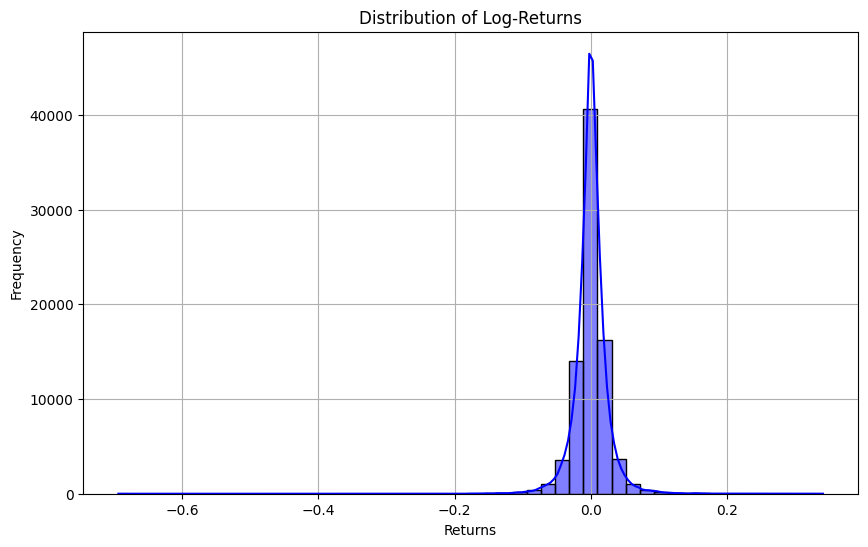

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the histogram of returns
plt.figure(figsize=(10,6))
sns.histplot(returns[0:].values.flatten(), bins=50, kde=True, color="blue")  # Histogram with density

# Labels and title
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.title("Distribution of Log-Returns")
plt.grid(True)

plt.show()


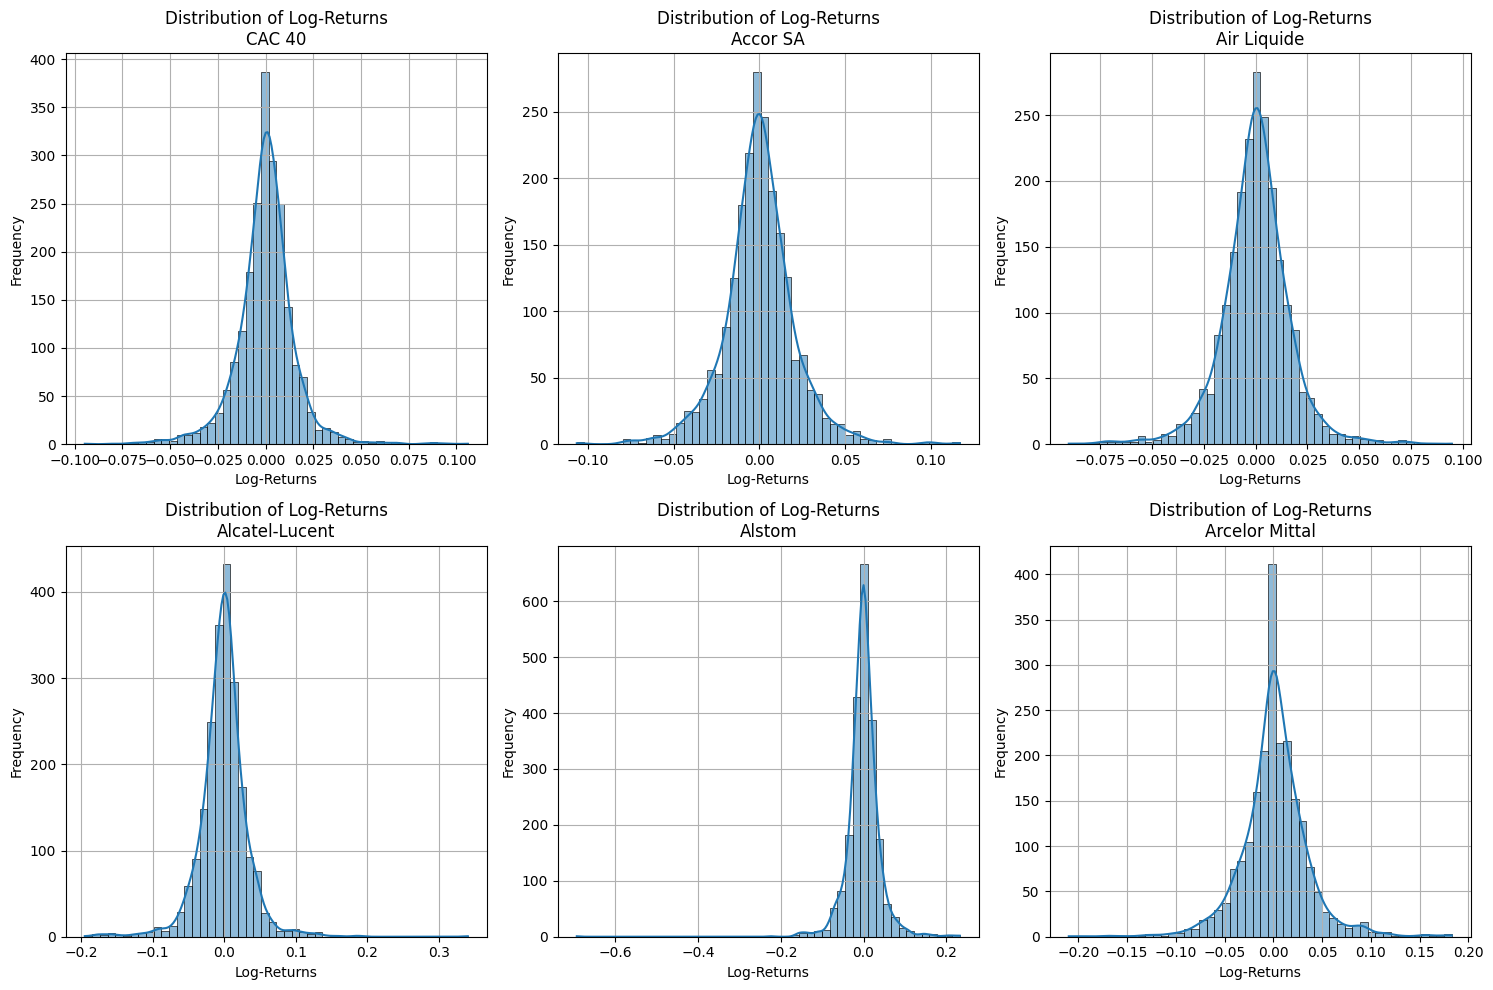

,Kolmogorov-Smirnov p-value,Shapiro-Wilk p-value
CAC 40,3.620500e-13,5.616679e-32
Accor SA,2.812664e-08,1.221780e-23
Air Liquide,9.296587e-08,2.009400e-26
Alcatel-Lucent,3.928113e-14,6.152152e-35
Alstom,2.257706e-19,2.927998e-42
Arcelor Mittal,4.713975e-12,1.705828e-29


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, shapiro
import pandas as pd

# Plot the histograms of the first 6 columns
columns = returns.columns[:6]

plt.figure(figsize=(15, 10))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(returns[col].dropna(), bins=50, kde=True)
    plt.title(f"Distribution of Log-Returns\n{col}")
    plt.xlabel("Log-Returns")
    plt.ylabel("Frequency")
    plt.grid(True)

plt.tight_layout()
plt.show()

# Kolmogorov-Smirnov and Shapiro-Wilk tests
ks_pvalues = {}
shapiro_pvalues = {}

for col in columns:
    data = returns[col].dropna()
    ks_stat, ks_pval = kstest(data, 'norm', args=(data.mean(), data.std()))
    shapiro_stat, shapiro_pval = shapiro(data)
    
    ks_pvalues[col] = ks_pval
    shapiro_pvalues[col] = shapiro_pval

# Display the p-values as a DataFrame
pvalues_df = pd.DataFrame({
    'Kolmogorov-Smirnov p-value': ks_pvalues,
    'Shapiro-Wilk p-value': shapiro_pvalues
})

pvalues_df


In [50]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Normalize the data
normalized_returns = pd.DataFrame(scaler.fit_transform(returns), columns=returns.columns, index=returns.index)

# Display the normalized data
normalized_returns.head()


,CAC 40,Accor SA,Air Liquide,Alcatel-Lucent,Alstom,Arcelor Mittal,AXA SA,BNP Paribas,Bouygues,Cap Gemini SA,...,Schneider Electric SA,Societe Generale,STMicroelectronics NV,Total SA,Unibail-Rodamco,Vallourec,Veolia Environnement,Vinci SA,Vivendi,Tecnip
Date,,,,,,,,,,,,,,,,,,,,,
2001-12-14,-1.033267,-0.198882,-0.915744,-1.204271,0.219582,0.886253,-1.001849,-0.396537,0.218641,0.150999,...,-0.367350,-0.625132,0.412923,-0.600707,-0.186794,-0.482874,0.946256,0.264352,-0.571082,0.996962
2001-12-17,2.116443,0.808487,0.612624,1.600680,0.683998,-1.435297,0.871853,1.347452,-0.177271,2.371031,...,-0.234864,1.650562,2.012943,2.266865,-0.032952,0.963041,-0.670354,0.588573,2.485247,1.131888
2001-12-18,-0.068990,-0.123052,0.451455,-0.672354,-0.101264,0.746993,-2.201536,0.137578,0.078989,0.098727,...,2.358417,-0.239441,-0.059355,0.416265,-0.290190,0.307298,-0.174599,-1.007732,1.398882,0.070689
2001-12-19,-0.171193,-0.887748,-0.403805,-0.290499,-0.724706,-0.037797,0.980381,-0.063327,-0.671524,-1.255165,...,-0.139035,-0.271765,-0.424833,0.071543,-0.603204,-0.330051,-0.670976,1.283551,-0.298488,-0.009571
2001-12-20,-0.591324,1.285916,-0.484895,-1.699345,-1.651123,0.876421,-0.112471,-0.305335,-1.505513,-0.412635,...,-2.431144,-0.710882,-2.049827,0.450472,0.434004,-1.128009,0.195704,0.056484,-0.461856,0.388975


In [52]:
from scipy.stats import shapiro

# Initialize the counter for non-normal series
non_normal_count = 0

# Loop through each column to apply the Shapiro-Wilk test
for i in range(returns.shape[1]):
    col_name = returns.columns[i]
    series = returns.iloc[:, i]

    result = shapiro(series)
    p_value = result[1]

    print(f"{col_name}: p-value = {p_value:.4f}")

    if p_value < 0.01:
        print(f" → The series '{col_name}' is not normally distributed (p < 0.01)")
        non_normal_count += 1
    else:
        print(f" → The series '{col_name}' follows a normal distribution (p ≥ 0.01)")

    print("-" * 50)

# Display the number of non-normal series
print(f"\nNumber of non-normal vectors: {non_normal_count} / {returns.shape[1]}")


CAC 40: p-value = 0.0000
 → The series 'CAC 40' is not normally distributed (p < 0.01)
--------------------------------------------------
Accor SA: p-value = 0.0000
 → The series 'Accor SA' is not normally distributed (p < 0.01)
--------------------------------------------------
Air Liquide: p-value = 0.0000
 → The series 'Air Liquide' is not normally distributed (p < 0.01)
--------------------------------------------------
Alcatel-Lucent: p-value = 0.0000
 → The series 'Alcatel-Lucent' is not normally distributed (p < 0.01)
--------------------------------------------------
Alstom: p-value = 0.0000
 → The series 'Alstom' is not normally distributed (p < 0.01)
--------------------------------------------------
Arcelor Mittal: p-value = 0.0000
 → The series 'Arcelor Mittal' is not normally distributed (p < 0.01)
--------------------------------------------------
AXA SA: p-value = 0.0000
 → The series 'AXA SA' is not normally distributed (p < 0.01)
---------------------------------------

Sur la base des p-valeurs, qui sont toutes inférieures à 1%, nous pouvons conclure que nous rejetons l'hypothèse nulle selon laquelle les données sont issues d'une loi gaussienne, avec un niveau de confiance de 99%.

In [26]:
'''from scipy.stats import kstest

# Initialisation du compteur pour les séries non normales
non_normal_count = 0

# Boucle sur chaque colonne pour appliquer le test de Shapiro-Wilk
for i in range(returns.shape[1]):
    col_name = returns.columns[i]
    series = returns.iloc[:, i]

    p_value = kstest(series, 'norm').pvalue


    print(f"{col_name}: p-value = {p_value:.4f}")

    if p_value < 0.01:
        print(f" → La série '{col_name}' n'est pas normale (p < 0.01)")
        non_normal_count += 1
    else:
        print(f" → La série '{col_name}' suit une distribution normale (p ≥ 0.01)")

    print("-" * 50)

# Affichage du nombre de séries non normales
print(f"\nNombre de vecteurs non normaux : {non_normal_count} / {normalized_returns.shape[1]}")
'''

CAC 40: p-value = 0.0000
 → La série 'CAC 40' n'est pas normale (p < 0.01)
--------------------------------------------------
Accor SA: p-value = 0.0000
 → La série 'Accor SA' n'est pas normale (p < 0.01)
--------------------------------------------------
Air Liquide: p-value = 0.0000
 → La série 'Air Liquide' n'est pas normale (p < 0.01)
--------------------------------------------------
Alcatel-Lucent: p-value = 0.0000
 → La série 'Alcatel-Lucent' n'est pas normale (p < 0.01)
--------------------------------------------------
Alstom: p-value = 0.0000
 → La série 'Alstom' n'est pas normale (p < 0.01)
--------------------------------------------------
Arcelor Mittal: p-value = 0.0000
 → La série 'Arcelor Mittal' n'est pas normale (p < 0.01)
--------------------------------------------------
AXA SA: p-value = 0.0000
 → La série 'AXA SA' n'est pas normale (p < 0.01)
--------------------------------------------------
BNP Paribas: p-value = 0.0000
 → La série 'BNP Paribas' n'est pas normal

Sur la base des p-valeurs, qui sont toutes inférieures à 1%, nous pouvons conclure que nous rejetons l'hypothèse nulle selon laquelle les données sont issues d'une loi gaussienne, avec un niveau de confiance de 99%.

### ICA Implementation

In [55]:
import importlib
import jadeR

importlib.reload(jadeR)  # Recharge le module modifié


<module 'jadeR' from 'C:\\Users\\olivi\\Downloads\\Cours  EK\\Semestre 2\\allocation et arbitrage Multi-asset\\jadeR.py'>

In [57]:
W = jadeR.jadeR(returns.values.T, verbose=True)

jade -> Looking for 38 sources
jade -> Removing the mean value
jade -> Whitening the data
jade -> Estimating cumulant matrices
jade -> Contrast optimization by joint diagonalization
jade -> Sweep #  0
completed in 703 rotations
jade -> Sweep #  1
completed in 703 rotations
jade -> Sweep #  2
completed in 703 rotations
jade -> Sweep #  3
completed in 703 rotations
jade -> Sweep #  4
completed in 703 rotations
jade -> Sweep #  5
completed in 703 rotations
jade -> Sweep #  6
completed in 703 rotations
jade -> Sweep #  7
completed in 703 rotations
jade -> Sweep #  8
completed in 702 rotations
jade -> Sweep #  9
completed in 703 rotations
jade -> Sweep # 10
completed in 703 rotations
jade -> Sweep # 11
completed in 703 rotations
jade -> Sweep # 12
completed in 703 rotations
jade -> Sweep # 13
completed in 702 rotations
jade -> Sweep # 14
completed in 703 rotations
jade -> Sweep # 15
completed in 703 rotations
jade -> Sweep # 16
completed in 703 rotations
jade -> Sweep # 17
completed in 702 

In [59]:
ICs = W@(returns.values.T)

In [61]:
ICs.shape

(38, 2148)

### Apercu des composantes indépendantes

In [63]:
df_ICs = pd.DataFrame(ICs.T, columns=[f"IC{i}" for i in range(1,39)])
df_ICs.index = returns.index

In [65]:
df_ICs.head()

,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,...,IC29,IC30,IC31,IC32,IC33,IC34,IC35,IC36,IC37,IC38
Date,,,,,,,,,,,,,,,,,,,,,
2001-12-14,-0.806042,2.460483,-0.320517,0.515651,-1.131679,-2.124760,-1.877111,0.020118,0.798052,-0.553992,...,-0.136698,-0.525239,0.257044,-1.121761,-1.114322,-1.423111,-0.396307,-2.610172,1.215786,-0.457288
2001-12-17,0.970492,1.151436,0.016462,0.643055,0.723883,0.549339,-2.506663,-0.618157,1.232168,-1.265335,...,0.928804,0.783534,1.555246,-0.405320,-0.032373,2.055204,0.633082,0.604968,-0.289658,1.011539
2001-12-18,-0.118994,-1.306439,-2.433402,0.437126,-0.953886,-0.099004,0.414733,-0.330803,-1.265935,-2.363293,...,0.561508,2.641981,-2.375736,0.091417,1.177045,-2.398466,1.459997,-1.111211,0.048791,2.630910
2001-12-19,0.825165,-0.548352,0.181118,0.159267,-0.142605,-1.016276,0.824713,-1.234665,0.009371,0.269501,...,-1.007669,-0.626500,1.672971,-0.006994,-0.469499,-0.957511,-1.595331,1.459646,-0.544604,-2.405514
2001-12-20,-0.402698,0.786803,-0.316381,0.807634,-0.301123,-0.891617,0.036962,-0.451263,1.340114,-0.028599,...,0.082070,-0.218299,-1.023103,-0.044530,1.342251,0.413226,-5.740170,0.639131,0.613419,-0.068429


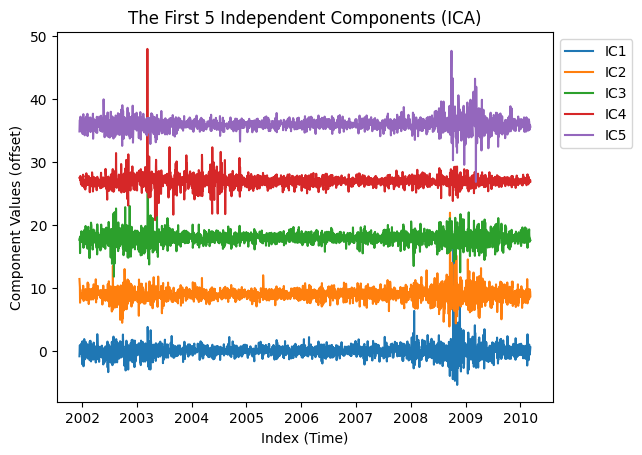

In [69]:
# plt.figure(figsize=(10, 6))
offset = 9  # Vertical offset between each curve (adjust as needed)

for i, col in enumerate(df_ICs.columns[:5]):  # Loop through the first 5 columns
    plt.plot(df_ICs.index, df_ICs[col] + i * offset, label=col)  # Progressive offset

plt.xlabel("Index (Time)")
plt.ylabel("Component Values (offset)")
plt.title("The First 5 Independent Components (ICA)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Legend placed on the right
plt.show()


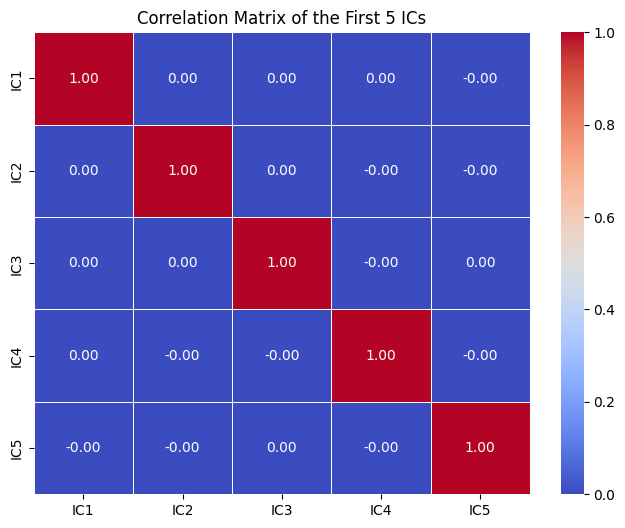

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the first 5 ICs
top_5_ICs = df_ICs.iloc[:, :5]

# Compute the correlation matrix
correlation_matrix = top_5_ICs.corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title and labels
plt.title("Correlation Matrix of the First 5 ICs")
plt.show()


### Calculation of the projection matrix A allowing the recovery of returns from the independent components

In [74]:
from numpy.linalg import inv

In [76]:

A=inv(W)
A.shape

(38, 38)

In [37]:

#A1=A[[0]].T #on récupère la première ligne de A correspondant au CAC40
#WICs=((A1*(df.T)).T) #CIs pondérés


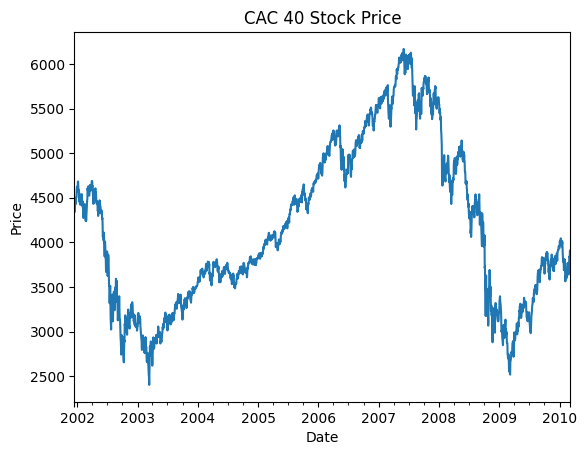

In [78]:
df["CAC 40"].plot()
plt.title("CAC 40 Stock Price")
plt.ylabel("Price")
plt.show()


### Calculation of the ICs weighted in A

In [81]:
def compute_weighted_ICs(A: np.ndarray, ICs: pd.DataFrame, df_returns: pd.DataFrame, company_name: str, norm_type: str = "L∞"):
    """
    Computes and sorts the weighted ICs for a given company.

    Parameters:
    - A : np.ndarray - Mixing matrix of size (n_stocks, n_ICs).
    - ICs : pd.DataFrame - Matrix of independent components (n_days, n_ICs).
    - df_returns : pd.DataFrame - DataFrame of returns where each company is a column.
    - company_name : str - Name of the company's column in df_returns.
    - norm_type : str - Type of norm used to sort the ICs ("L∞", "L2", "L1").

    Returns:
    - weighted_ICs_sorted : pd.DataFrame - DataFrame of the sorted weighted ICs.
    """

    # Check if the company exists in df_returns
    if company_name not in df_returns.columns:
        raise ValueError(f"The company '{company_name}' does not exist in df_returns.")

    # Get the index of the company's column in df_returns
    company_idx = df_returns.columns.get_loc(company_name)

    # Check if the index is valid for matrix A
    if company_idx >= A.shape[0]:
        raise ValueError(f"The retrieved index ({company_idx}) exceeds the size of matrix A ({A.shape[0]}).")

    # Retrieve the corresponding row from matrix A
    company_weights = A[company_idx, :]  # Extracted as a numpy vector

    # Compute the weighted ICs: element-wise multiplication
    weighted_ICs = company_weights.T * ICs.T
    weighted_ICs = weighted_ICs.T

    # Compute the norm for each IC
    if norm_type == "Linf":
        norms = np.abs(weighted_ICs).max(axis=0)  # Max norm (maximum absolute value for each IC)
    elif norm_type == "L2":
        norms = np.sqrt((weighted_ICs ** 2).sum(axis=0))  # Euclidean norm
    elif norm_type == "L1":
        norms = np.abs(weighted_ICs).sum(axis=0)  # Manhattan norm (sum of absolute values)
    else:
        raise ValueError("Unrecognized norm type. Use 'L∞', 'L2', or 'L1'.")

    # Sort the ICs according to the chosen norm
    sorted_indices = norms.sort_values(ascending=False).index
    weighted_ICs_sorted = weighted_ICs[sorted_indices]

    return weighted_ICs_sorted


In [83]:
def compute_ICs(A: np.ndarray, ICs: pd.DataFrame, df_returns: pd.DataFrame, norm_type: str = "L∞"):
    """
    Computes and sorts the ICs for a given company.

    Parameters:
    - A : np.ndarray - Mixing matrix of size (n_stocks, n_ICs).
    - ICs : pd.DataFrame - Matrix of independent components (n_days, n_ICs).
    - df_returns : pd.DataFrame - DataFrame of returns where each company is a column.
    - norm_type : str - Type of norm used to sort the ICs ("L∞", "L2", "L1").

    Returns:
    - ICs_sorted : pd.DataFrame - DataFrame of the sorted ICs.
    """

    # Compute norms for each IC
    if norm_type == "Linf":
        norms = np.abs(ICs).max(axis=0)  # Max norm (maximum absolute value of each IC)
    elif norm_type == "L2":
        norms = np.sqrt((ICs ** 2).sum(axis=0))  # Euclidean norm
    elif norm_type == "L1":
        norms = np.abs(ICs).sum(axis=0)  # Manhattan norm (sum of absolute values)
    else:
        raise ValueError("Unrecognized norm type. Use 'L∞', 'L2', or 'L1'.")

    # Sort the ICs according to the chosen norm
    sorted_indices = norms.sort_values(ascending=False).index
    ICs_sorted = ICs[sorted_indices]

    return ICs_sorted


In [85]:
IC_Weight_Total=compute_weighted_ICs(A=A, ICs=df_ICs , df_returns=returns, company_name ="CAC 40", norm_type='Linf')

In [87]:
ICs_sorted=compute_ICs(A=A, ICs=df_ICs , df_returns=returns, norm_type='Linf')

In [89]:
IC_Weight_Total.head()

,IC1,IC2,IC3,IC15,IC11,IC6,IC28,IC8,IC22,IC14,...,IC18,IC16,IC36,IC34,IC26,IC35,IC37,IC19,IC23,IC38
Date,,,,,,,,,,,,,,,,,,,,,
2001-12-14,-0.005397,0.013318,-0.001783,-2.991067e-04,-0.003509,-0.006284,-0.001118,-0.000055,-0.001878,0.000260,...,-0.002096,0.002385,-0.002126,-0.000948,-0.000127,-0.000308,-0.000794,0.000062,-2.073586e-05,-0.000010
2001-12-17,0.006498,0.006232,0.000092,6.322604e-04,0.004489,0.001625,0.002282,0.001679,0.005409,-0.006576,...,0.001044,-0.003769,0.000493,0.001369,0.000337,0.000492,0.000189,-0.000012,7.705167e-06,0.000023
2001-12-18,-0.000797,-0.007071,-0.013537,-5.753308e-07,0.004926,-0.000293,0.003337,0.000898,-0.002121,0.003288,...,-0.000213,0.000064,-0.000905,-0.001598,-0.000227,0.001134,-0.000032,-0.000133,-4.265734e-06,0.000059
2001-12-19,0.005525,-0.002968,0.001008,9.647970e-04,-0.001845,-0.003006,-0.001010,0.003353,0.002015,-0.000270,...,-0.000655,-0.000377,0.001189,-0.000638,0.000400,-0.001239,0.000356,0.000094,-6.080017e-07,-0.000054
2001-12-20,-0.002696,0.004259,-0.001760,4.782145e-03,-0.003868,-0.002637,0.000450,0.001226,-0.000441,-0.000769,...,-0.000420,0.001622,0.000521,0.000275,0.000807,-0.004459,-0.000401,0.000103,6.547817e-06,-0.000002


In [91]:
def plot_dominant_weighted_ICs(weighted_ICs_sorted: pd.DataFrame, top_n: int = 4):
    """
    Plots the top 4 dominant weighted ICs and the sum of the remaining ICs.

    Parameters:
    - weighted_ICs_sorted : pd.DataFrame - Matrix of already sorted weighted ICs (time x ICs).
    - top_n : int - Number of dominant ICs to display (default is 4).

    Output:
    - Displays a plot of the top 4 dominant ICs plus the sum of the remaining ICs.
    """

    # Select the top_n dominant ICs (first columns)
    dominant_ICs = weighted_ICs_sorted.iloc[:, :top_n]

    # Sum of the remaining ICs
    if weighted_ICs_sorted.shape[1] > top_n:
        remaining_ICs_sum = weighted_ICs_sorted.iloc[:, top_n:].sum(axis=1)
    else:
        remaining_ICs_sum = None  # If there are no remaining ICs, no sum is plotted

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot the top dominant ICs with vertical offset
    offset = 0.1  # Vertical offset for separation
    for i, col in enumerate(dominant_ICs.columns):
        plt.plot(weighted_ICs_sorted.index, dominant_ICs[col] + i * offset, label=f"Dominant {col}")

    # Plot the sum of the remaining ICs if applicable
    if remaining_ICs_sum is not None:
        plt.plot(weighted_ICs_sorted.index, remaining_ICs_sum + top_n * offset,
                 label="Sum of Remaining ICs", linestyle="dashed", color="black")

    # Labels and title
    plt.xlabel("Days")
    plt.ylabel("Weighted Independent Components")
    plt.title("Main Weighted Independent Components and Sum of Remaining Components")
    plt.legend(loc="upper right")
    plt.show()

    return remaining_ICs_sum


In [93]:
def plot_dominant_ICs(ICs: pd.DataFrame, top_n: int = 4):
    """
    Plots the top 4 dominant unweighted ICs and the sum of the remaining ICs.

    Parameters:
    - ICs : pd.DataFrame - Matrix of already sorted ICs (time x ICs).
    - top_n : int - Number of dominant ICs to display (default is 4).

    Output:
    - Displays a plot of the top 4 dominant ICs plus the sum of the remaining ICs.
    """

    # Select the top_n dominant ICs (first columns)
    dominant_ICs = ICs.iloc[:, :top_n]

    # Sum of the remaining ICs
    if ICs.shape[1] > top_n:
        remaining_ICs_sum = ICs.iloc[:, top_n:].sum(axis=1)
    else:
        remaining_ICs_sum = None  # If there are no remaining ICs, no sum is plotted

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot the top dominant ICs with vertical offset
    offset = 30  # Vertical offset for separation
    for i, col in enumerate(dominant_ICs.columns):
        plt.plot(ICs.index, dominant_ICs[col] + i * offset, label=f"Dominant {col}")

    # Plot the sum of the remaining ICs if applicable
    if remaining_ICs_sum is not None:
        plt.plot(ICs.index, remaining_ICs_sum + top_n * offset,
                 label="Sum of Remaining ICs", linestyle="dashed", color="black")

    # Labels and title
    plt.xlabel("Days")
    plt.ylabel("Independent Components")
    plt.title("Main Independent Components and Sum of Remaining Components")
    plt.legend(loc="upper right")
    plt.show()

    return remaining_ICs_sum


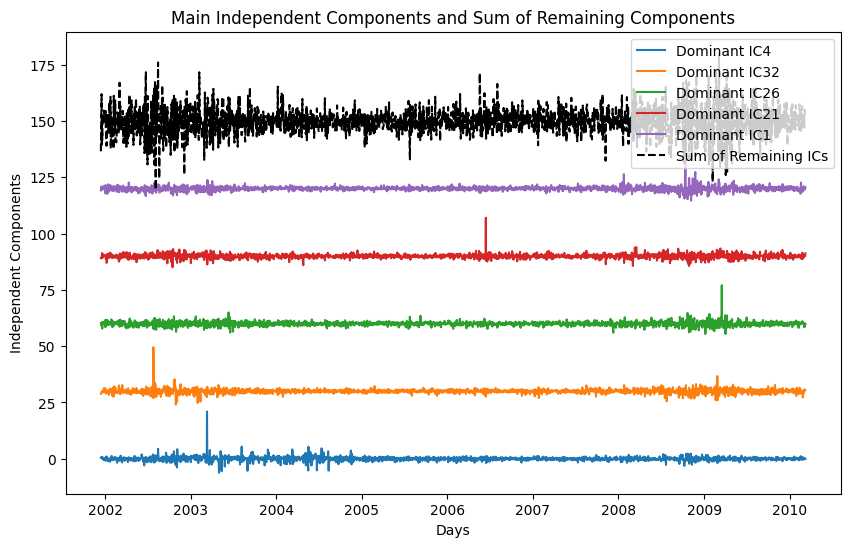

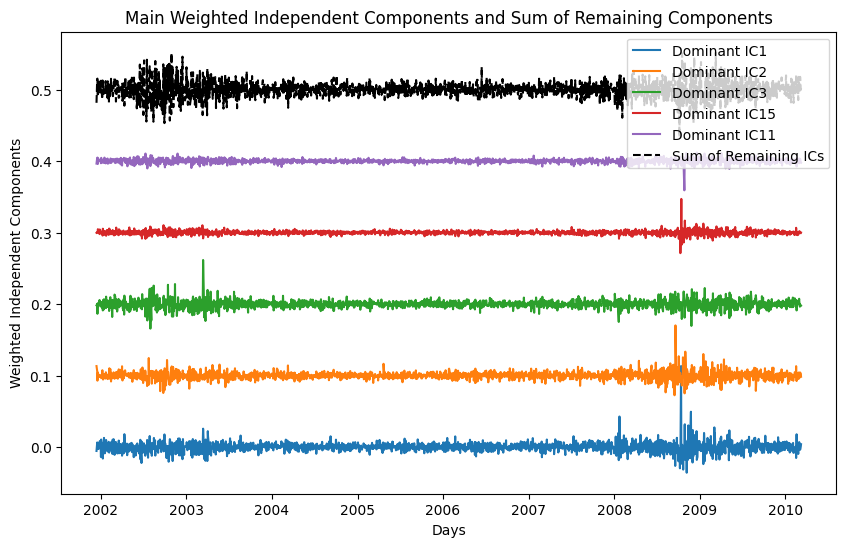

In [95]:
r_S= plot_dominant_ICs(ICs= ICs_sorted, top_n = 5)


r_S= plot_dominant_weighted_ICs(weighted_ICs_sorted= IC_Weight_Total, top_n = 5)



### 📌 **Analysis of Dominant Weighted Independent Components**

#### **1️⃣ General Structure**  
The chart shows the **most influential independent components after weighting**, along with the **sum of the remaining components** represented by the dotted black curve.  
- Each colored curve corresponds to a **dominant independent component** that significantly contributes to market returns.  
- The black curve illustrates the **cumulative impact of the other components**, which are generally weaker and more diffuse.

---

#### **2️⃣ Key Observations**  

✅ **A small number of components explain the majority of variations**  
- Only a few independent components dominate the market structure, confirming that **stock returns are influenced by a limited number of underlying factors**.

✅ **Presence of volatility spikes during certain periods**  
- Some components show **sudden fluctuations**, especially around periods of economic turbulence.  
- These spikes can be linked to **financial crises, macroeconomic events, or specific market shocks**.

✅ **Secondary components have limited impact**  
- The **sum of the other independent components (black curve)** remains relatively stable, indicating that their overall contribution is minor.  
- This suggests that **only a few key components truly drive returns**, while the others play a more marginal role.

---

#### **3️⃣ Conclusion and Implications**  
📌 **ICA analysis helps extract the dominant factors driving market movements.**  
📌 **Periods of high volatility often coincide with times of crisis or economic transition.**  
📌 **In risk management and asset allocation, these results can be leveraged to anticipate shocks and improve investment strategies.**


In [98]:
def reconstruct_price(weighted_ICs_sorted: pd.DataFrame, df_prices: pd.DataFrame, company_name: str, top_n: int = 4):
    if company_name not in df_prices.columns:
        raise ValueError(f"The company '{company_name}' does not exist in df_prices.")

    actual_price = df_prices[company_name]
    
    # Adjust sizes if necessary
    if len(weighted_ICs_sorted) < len(actual_price):
        actual_price = actual_price.iloc[-len(weighted_ICs_sorted):]

    dominant_ICs = weighted_ICs_sorted.iloc[:, :top_n]
    
    if weighted_ICs_sorted.shape[1] > top_n:
        remaining_ICs_sum = weighted_ICs_sorted.iloc[:, top_n:].sum(axis=1)
    else:
        remaining_ICs_sum = np.zeros_like(actual_price)

    initial_price = actual_price.iloc[0]

    reconstructed_price = initial_price * np.exp(np.cumsum(dominant_ICs.sum(axis=1)))
    residual_price = initial_price * np.exp(np.cumsum(remaining_ICs_sum))

    # Ensure the indexes are aligned
    plt.figure(figsize=(10, 6))
    
    plt.plot(actual_price.index, actual_price, linestyle="dotted", label="Actual Price (dotted line)")
    plt.plot(actual_price.index, reconstructed_price, linestyle="solid", label=f"Reconstructed Price (Top {top_n} ICs)")
    plt.plot(actual_price.index, residual_price, linestyle="dashed", label="Sum of Remaining ICs")
    
    plt.xlabel("Days")
    plt.ylabel("Index Value")
    plt.title(f"Price Reconstruction for {company_name} (Log-Returns)")
    plt.legend()
    plt.show()


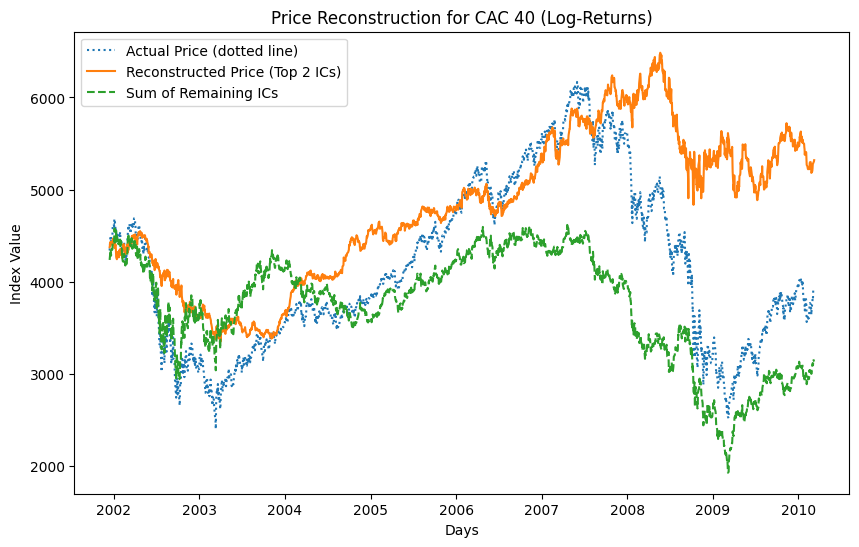

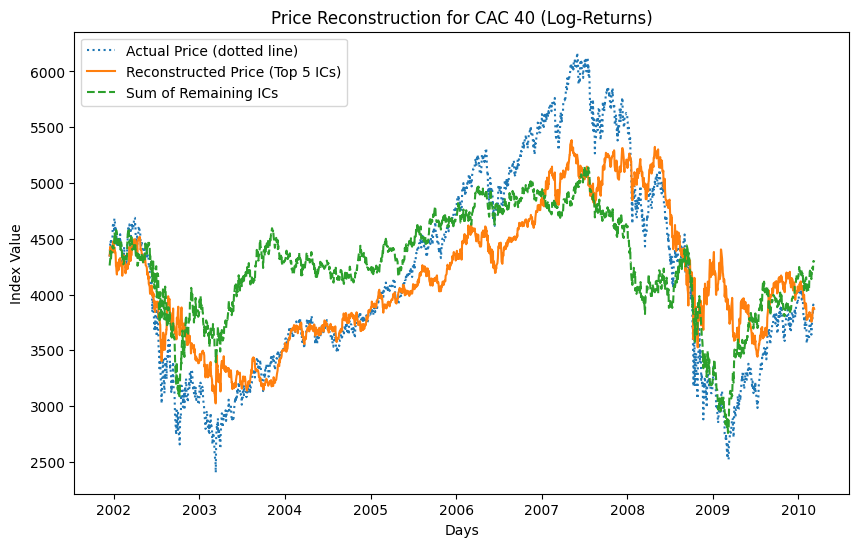

In [100]:

# Exécution de la fonction avec 7 ICs
df_rmse = reconstruct_price(weighted_ICs_sorted=IC_Weight_Total, df_prices=df, company_name='CAC 40', top_n=2)
df_rmse = reconstruct_price(weighted_ICs_sorted=IC_Weight_Total, df_prices=df, company_name='CAC 40', top_n=5)


In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def threshold_ICs(weighted_ICs_sorted: pd.DataFrame, threshold: float):
    """
    Applies thresholding to the weighted ICs: only values above a threshold are kept.
    
    Parameters:
    - weighted_ICs_sorted : pd.DataFrame - Matrix of sorted weighted ICs (time x ICs).
    - threshold : float - Threshold value (e.g., 0.5). Values with absolute magnitude below this threshold are set to zero.

    Returns:
    - thresholded_ICs : pd.DataFrame - Matrix of ICs after thresholding.
    """
    thresholded_ICs = weighted_ICs_sorted.copy()
    thresholded_ICs[np.abs(thresholded_ICs) < threshold] = 0
    return thresholded_ICs


def reconstruct_price_thresholded(weighted_ICs_sorted: pd.DataFrame, df_prices: pd.DataFrame, company_name: str, top_n: int = 4, threshold: float = 0):
    """
    Reconstructs the stock price via log-returns after thresholding the ICs.

    Parameters:
    - weighted_ICs_sorted : pd.DataFrame - Matrix of sorted weighted ICs (time x ICs).
    - df_prices : pd.DataFrame - DataFrame of actual stock prices.
    - company_name : str - Name of the company to reconstruct.
    - top_n : int - Number of dominant ICs to use.
    - threshold : float - Threshold applied to ICs (values below |threshold| are set to zero).

    Displays:
    - A plot comparing the real price, the reconstructed price with thresholded dominant ICs, and the sum of the remaining ICs.
    """

    if company_name not in df_prices.columns:
        raise ValueError(f"The company '{company_name}' does not exist in df_prices.")

    actual_price = df_prices[company_name]
    
    # Adjust sizes if necessary
    if len(weighted_ICs_sorted) < len(actual_price):
        actual_price = actual_price.iloc[-len(weighted_ICs_sorted):]

    # Dominant (top_n) and remaining ICs
    dominant_ICs = weighted_ICs_sorted.iloc[:, :top_n].copy()
    remaining_ICs = weighted_ICs_sorted.iloc[:, top_n:].copy() if weighted_ICs_sorted.shape[1] > top_n else pd.DataFrame(0, index=weighted_ICs_sorted.index, columns=[])

    # Apply thresholding
    dominant_ICs[np.abs(dominant_ICs) < threshold] = 0
    remaining_ICs[np.abs(remaining_ICs) < threshold] = 0

    # Reconstruct log-returns
    dominant_log_returns = dominant_ICs.sum(axis=1)
    remaining_log_returns = remaining_ICs.sum(axis=1) if not remaining_ICs.empty else np.zeros_like(dominant_log_returns)

    initial_price = actual_price.iloc[0]

    # Reconstruct prices via cumulative log-returns
    reconstructed_price = initial_price * np.exp(np.cumsum(dominant_log_returns))
    residual_price = initial_price * np.exp(np.cumsum(remaining_log_returns))

    # --- Plot reconstructed prices ---
    plt.figure(figsize=(10, 6))
    plt.plot(actual_price.index, actual_price, linestyle="dotted", label="Actual Price (dotted line)")
    plt.plot(actual_price.index, reconstructed_price, linestyle="solid", label=f"Reconstructed Price (Top {top_n} Thresholded ICs, threshold={threshold})")
    
    plt.xlabel("Days")
    plt.ylabel("Index Value")
    plt.title(f"Price Reconstruction for {company_name} with Thresholding")
    plt.legend()
    plt.show()

    # --- Plot reconstructed log-returns ---
    plt.figure(figsize=(10, 6))
    plt.plot(dominant_log_returns, label=f"Dominant Log-Returns (threshold={threshold})")
    
    plt.xlabel("Days")
    plt.ylabel("Log-Returns")
    plt.title(f"Log-Return Reconstruction for {company_name}")
    plt.legend()
    plt.show()


## seuil 0.05

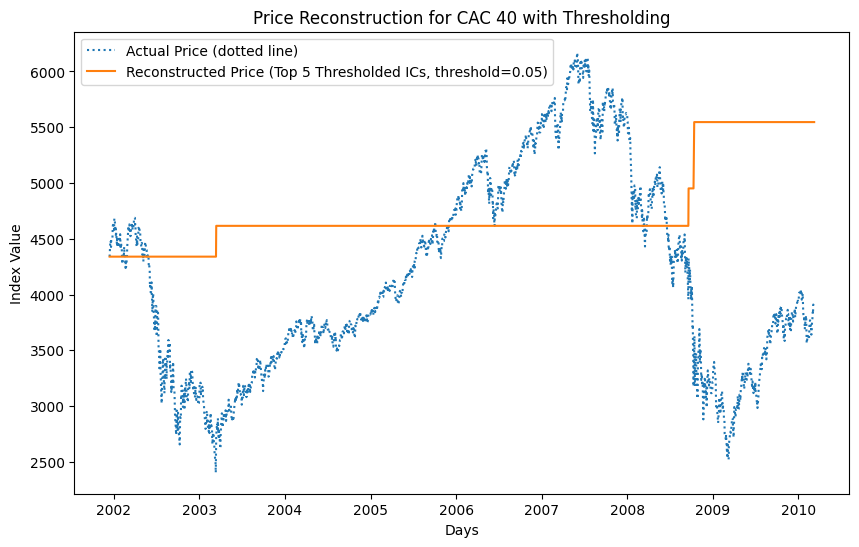

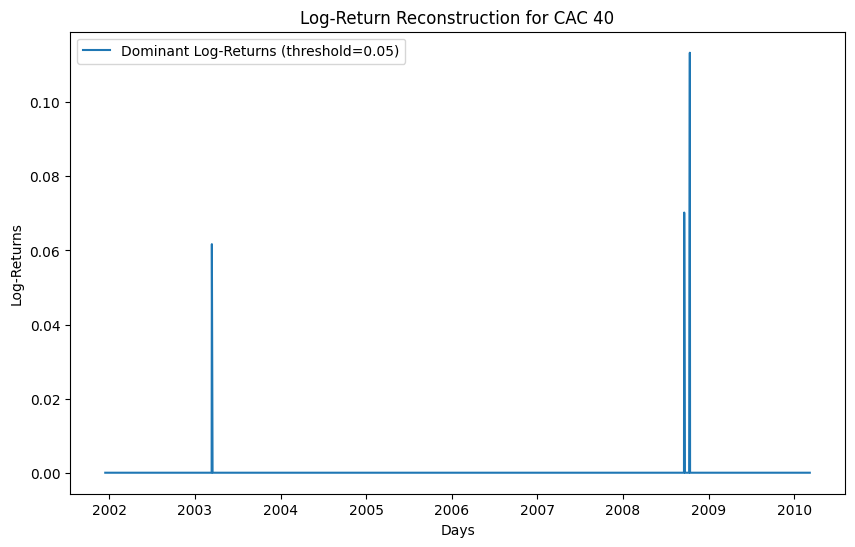

In [104]:
reconstruct_price_thresholded(weighted_ICs_sorted= IC_Weight_Total, df_prices= df, company_name= "CAC 40", top_n = 5, threshold = 0.05)

## Seuil 0.01

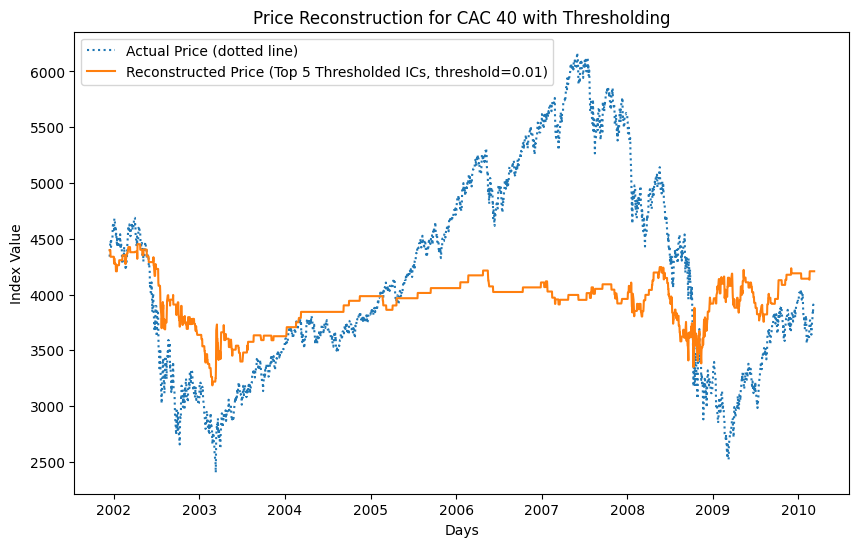

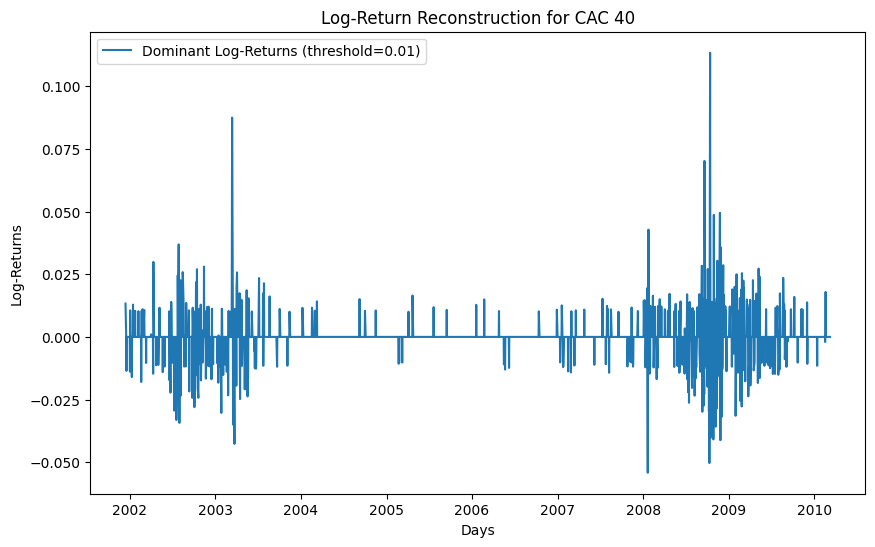

In [106]:
reconstruct_price_thresholded(weighted_ICs_sorted= IC_Weight_Total, df_prices= df, company_name= "CAC 40", top_n = 5, threshold = 0.01)

## Seuil 0.001

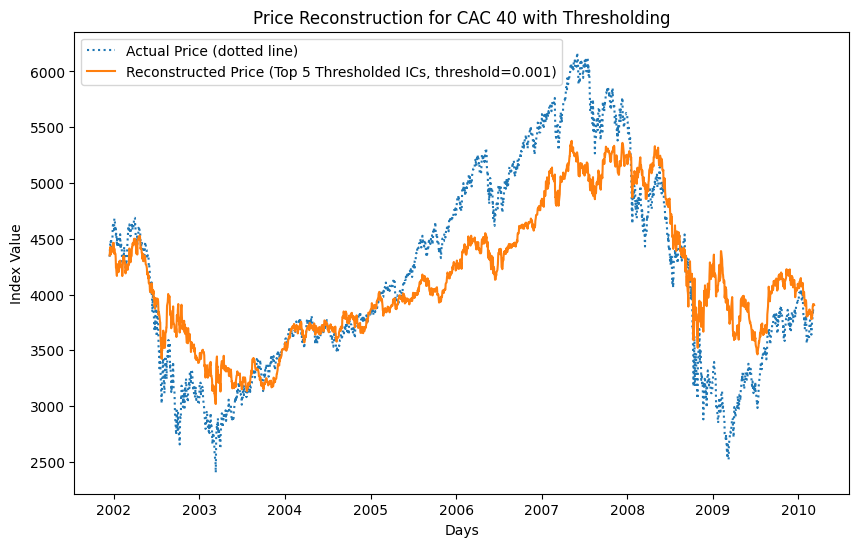

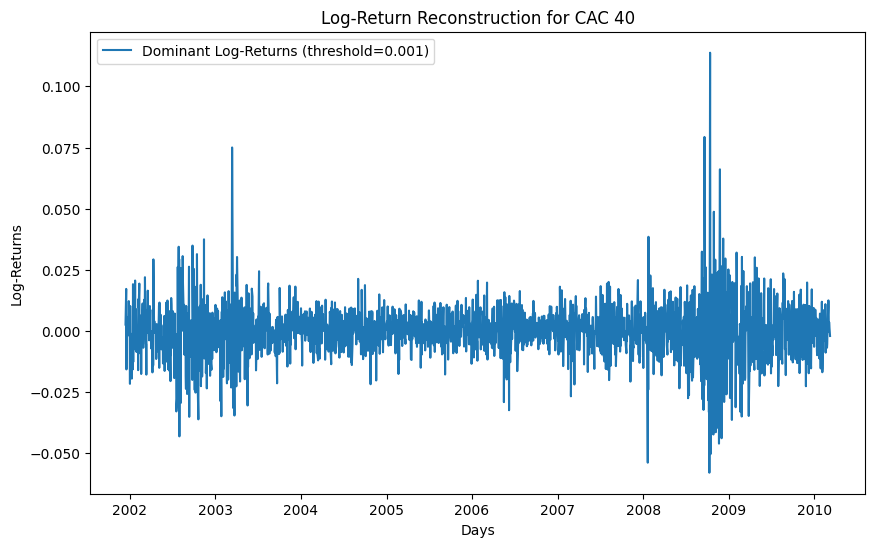

In [108]:
reconstruct_price_thresholded(weighted_ICs_sorted= IC_Weight_Total, df_prices= df, company_name= "CAC 40", top_n = 5, threshold = 0.001)


# PCA (Sans seuillage)

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def perform_pca(df_returns: pd.DataFrame):
    """
    Performs PCA on the returns and returns the results.

    Parameters:
    - df_returns : pd.DataFrame - Matrix of returns (days x companies).

    Returns:
    - df_pca : pd.DataFrame - Projection of returns onto all PCs.
    - pca : Trained PCA object.
    - explained_variance_ratio : Variance explained by each PC.
    - scaler : StandardScaler trained on the returns.
    - feature_names : List of company (feature) names used.
    """
    # Standardization of returns (mean-centering and scaling)
    scaler = StandardScaler()
    returns_scaled = scaler.fit_transform(df_returns)

    # Full PCA (extracting all components)
    pca = PCA(n_components=df_returns.shape[1])
    principal_components = pca.fit_transform(returns_scaled)

    # Explained variance
    explained_variance_ratio = pca.explained_variance_ratio_

    # Create the DataFrame of PCs
    df_pca = pd.DataFrame(principal_components, index=df_returns.index, columns=[f"PC{i+1}" for i in range(df_returns.shape[1])])

    return df_pca, pca, explained_variance_ratio, scaler, df_returns.columns


def reconstruct_pca(df_pca: pd.DataFrame, pca: PCA, scaler: StandardScaler, df_prices: pd.DataFrame, company_name: str, top_n: int):
    """
    Reconstructs returns and stock prices after PCA and displays the reconstructions.

    Parameters:
    - df_pca : pd.DataFrame - Projection of returns onto PCs.
    - pca : Trained PCA object.
    - scaler : StandardScaler trained on the returns.
    - df_prices : pd.DataFrame - Real stock prices.
    - company_name : str - Name of the company.
    - top_n : int - Number of dominant PCs to use.

    Output:
    - Plots of actual vs reconstructed prices with dominant PCs.
    - Plots of reconstructed returns.
    """

    # Check if the company exists
    if company_name not in df_prices.columns:
        raise ValueError(f"The company '{company_name}' does not exist in df_prices.")

    # Select top_n PCs and the remaining ones
    pcs_top = df_pca.iloc[:, :top_n]  # Top principal components
    pcs_remaining = df_pca.iloc[:, top_n:]  # Remaining components (not used here, but could be)

    # Projection matrices
    components_top = pca.components_[:top_n, :]  # Matrix of top PCs

    # Reconstruct returns with top PCs
    reconstructed_returns_top = np.dot(pcs_top, components_top)

    # Inverse transform (denormalization)
    reconstructed_returns_top = scaler.inverse_transform(reconstructed_returns_top)

    # Convert to DataFrame
    df_reconstructed_top = pd.DataFrame(reconstructed_returns_top, index=df_pca.index, columns=df_prices.columns)

    # Select actual price
    actual_price = df_prices[company_name]
    initial_price = actual_price.iloc[0]

    # Reconstruct price from cumulative log-returns
    reconstructed_price_top = initial_price * np.exp(np.cumsum(df_reconstructed_top[company_name]))

    # --- Plot reconstructed prices ---
    plt.figure(figsize=(10, 6))
    plt.plot(actual_price.index, actual_price, linestyle="dotted", label="Actual Price")
    plt.plot(reconstructed_price_top.index, reconstructed_price_top, linestyle="solid", label=f"Reconstructed Price (Top {top_n} PCs)")
    plt.xlabel("Days")
    plt.ylabel("Index Value")
    plt.title(f"Price Reconstruction for {company_name} after PCA")
    plt.legend()
    plt.show()

    # --- Plot reconstructed returns ---
    plt.figure(figsize=(10, 5))
    plt.plot(df_reconstructed_top[company_name], linestyle="solid", label=f"Reconstructed Returns (Top {top_n} PCs)")
    plt.xlabel("Days")
    plt.ylabel("Log-Returns")
    plt.title(f"Return Reconstruction for {company_name} after PCA")
    plt.legend()
    plt.show()


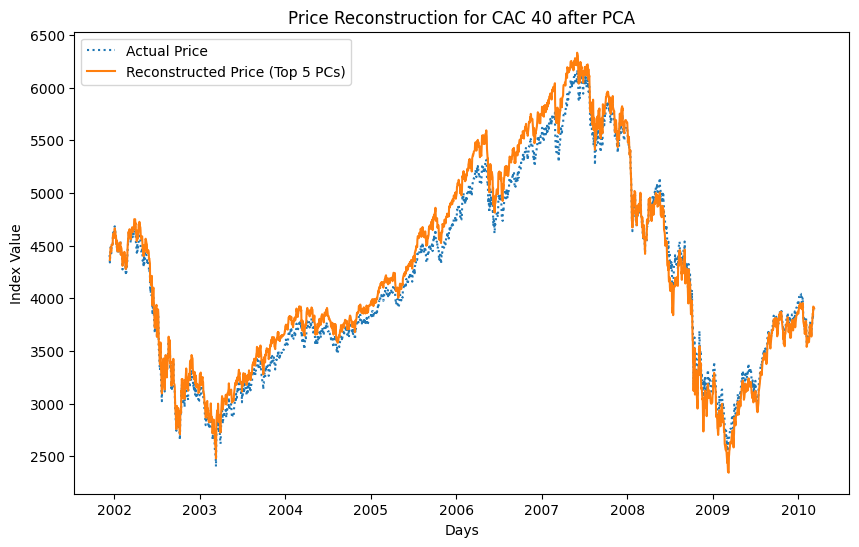

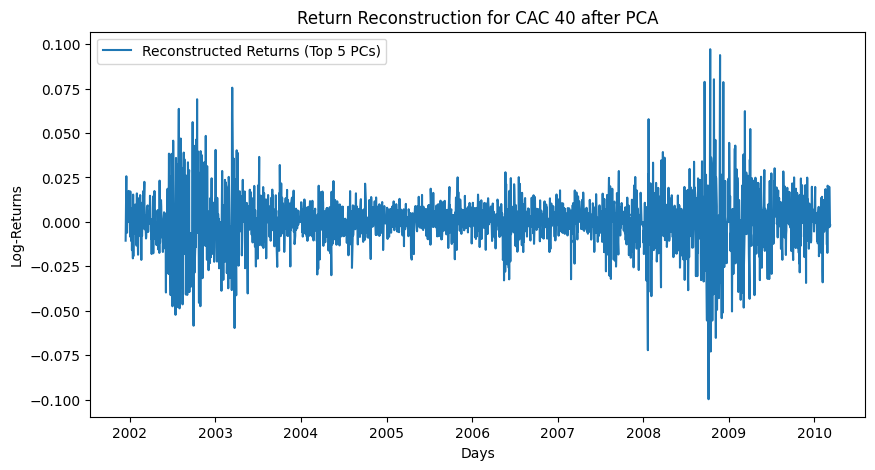

In [112]:
# Étape 1 : Effectuer la PCA
df_pca, pca_model, explained_variance, scaler_pca, feature_names = perform_pca(returns)

# Étape 2 : Reconstruction des prix et rendements avec les PCs dominantes et restantes
reconstruct_pca(df_pca, pca_model, scaler_pca, df, "CAC 40", top_n=5)


# PCA avec seuillage 

In [114]:
def threshold_and_reconstruct_pca(df_pca: pd.DataFrame, pca: PCA, scaler: StandardScaler, df_prices: pd.DataFrame, company_name: str, top_n: int, threshold: float):
    """
    Applies thresholding to dominant PCs, reconstructs returns and stock prices after PCA, 
    and displays the reconstruction.

    Parameters:
    - df_pca : pd.DataFrame - Projection of returns onto the PCs.
    - pca : PCA - Trained PCA object.
    - scaler : StandardScaler - Fitted scaler used to normalize returns.
    - df_prices : pd.DataFrame - Real stock prices.
    - company_name : str - Name of the company to reconstruct.
    - top_n : int - Number of dominant PCs to use.
    - threshold : float - Threshold to remove small values.

    Returns:
    - df_pca_thresholded : pd.DataFrame - PCs after thresholding.
    - df_reconstructed_top : pd.DataFrame - Reconstructed returns using thresholded PCs.
    """

    # Check if the company exists in the dataset
    if company_name not in df_prices.columns:
        raise ValueError(f"The company '{company_name}' does not exist in df_prices.")

    # Apply thresholding to the PCA projections
    df_pca_thresholded = df_pca.copy()
    df_pca_thresholded[np.abs(df_pca_thresholded) < threshold] = 0  # Thresholding small values

    # Select thresholded top PCs
    pcs_top = df_pca_thresholded.iloc[:, :top_n]

    # Get the projection matrix for the top PCs
    components_top = pca.components_[:top_n, :]

    # Reconstruct the returns from the top PCs
    reconstructed_returns_top = np.dot(pcs_top, components_top)

    # Inverse transform to get back to the original return scale
    reconstructed_returns_top = scaler.inverse_transform(reconstructed_returns_top)

    # Convert to DataFrame
    df_reconstructed_top = pd.DataFrame(reconstructed_returns_top, index=df_pca.index, columns=df_prices.columns)

    # Get the actual price series
    actual_price = df_prices[company_name]
    initial_price = actual_price.iloc[0]

    # Reconstruct the price from cumulative log-returns
    reconstructed_price_top = initial_price * np.exp(np.cumsum(df_reconstructed_top[company_name]))

    # --- Plot reconstructed prices after thresholding ---
    plt.figure(figsize=(10, 6))
    plt.plot(actual_price.index, actual_price, linestyle="dotted", label="Actual Price")
    plt.plot(reconstructed_price_top.index, reconstructed_price_top, linestyle="solid",
             label=f"Reconstructed Price (Top {top_n} PCs after thresholding, threshold={threshold})")
    plt.xlabel("Days")
    plt.ylabel("Index Value")
    plt.title(f"Price Reconstruction for {company_name} after PCA (Thresholding)")
    plt.legend()
    plt.show()

    # --- Plot reconstructed returns after thresholding ---
    plt.figure(figsize=(10, 5))
    plt.plot(df_reconstructed_top[company_name], linestyle="solid",
             label=f"Reconstructed Returns (Top {top_n} PCs after thresholding, threshold={threshold})")
    plt.xlabel("Days")
    plt.ylabel("Log-Returns")
    plt.title(f"Return Reconstruction for {company_name} after PCA (Thresholding)")
    plt.legend()
    plt.show()

    return df_pca_thresholded, df_reconstructed_top


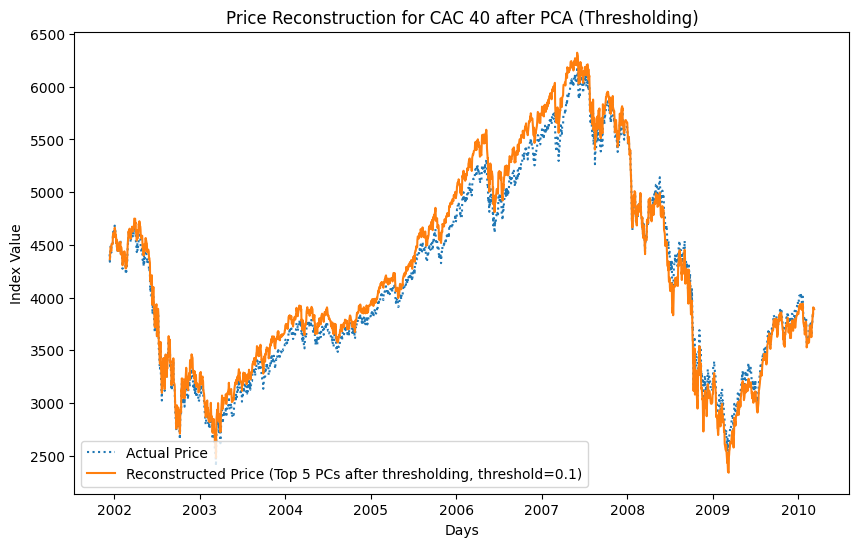

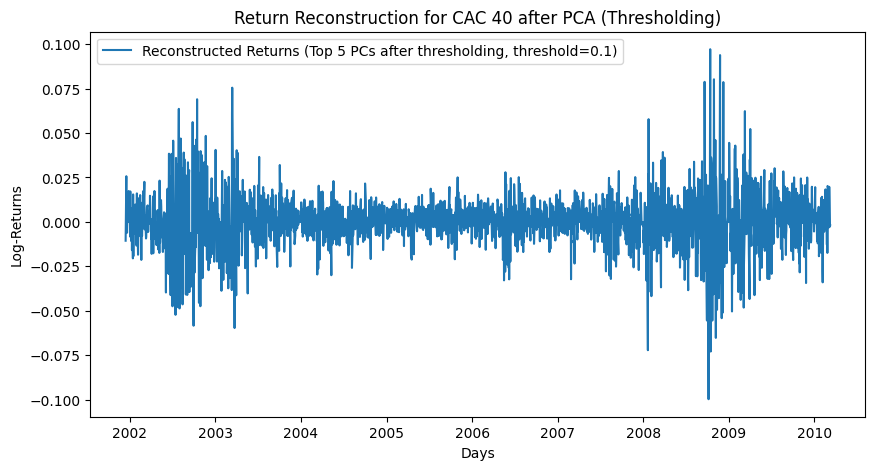

In [116]:
# Step 1: Perform PCA
df_pca, pca_model, explained_variance, scaler_pca, feature_names = perform_pca(returns)

# Step 2: Thresholding and reconstruction of prices/returns
df_pca_thresholded, df_reconstructed_pca_ts = threshold_and_reconstruct_pca(
    df_pca, pca_model, scaler_pca, df, company_name="CAC 40", top_n=5, threshold=0.1
)
